<a href="https://colab.research.google.com/github/karolostsezanas/Fashion-MNIST-Comparison-of-Sigmoid-and-ReLU/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageOps

import keras
from keras import layers, models, optimizers, losses, metrics
from sklearn.metrics import confusion_matrix, classification_report

Loading Fashion-MNIST and basic preprocessing

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = (x_train.astype("float32") / 255.0).reshape(-1, 28 * 28)
x_test  = (x_test.astype("float32")  / 255.0).reshape(-1, 28 * 28)

y_train = y_train.reshape(-1)
y_test  = y_test.reshape(-1)

CLASS_NAMES = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784) (60000,) (10000, 784) (10000,)


Model Helpers Setup

In [ ]:
def make_mlp(activation="sigmoid", dropout=0.0):
    """
    Build a 2-hidden-layer MLP for Fashion-MNIST (flattened 28x28 -> 784).
    Args:
        activation: Non-linearity for hidden layers. We will use "sigmoid" or "relu".
        dropout: Dropout rate in [0,1].
    Returns:
        A Keras Sequential model with:
          Input(784) -> Dense(256, act) -> [Dropout] ->
          Dense(128, act) -> [Dropout] -> Dense(10, softmax)
    """
    return models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(256, activation=activation),
        *( [layers.Dropout(dropout)] if dropout > 0 else [] ),
        layers.Dense(128, activation=activation),
        *( [layers.Dropout(dropout)] if dropout > 0 else [] ),
        layers.Dense(10, activation="softmax"),
    ])

def compile_with_sgd(model, lr=0.1):
    opt = optimizers.SGD(learning_rate=lr)
    model.compile(
        optimizer=opt,
        loss=losses.SparseCategoricalCrossentropy(),
        metrics=[metrics.SparseCategoricalAccuracy(name="acc")]
    )
    return model

def plot_history(hist, title):
    H = hist.history
    fig, ax = plt.subplots(1, 2, figsize=(9, 3))
    ax[0].plot(H["loss"], label="train")
    ax[0].plot(H["val_loss"], label="val")
    ax[0].set_title(f"{title} loss")
    ax[0].legend()
    ax[1].plot(H["acc"], label="train")
    ax[1].plot(H["val_acc"], label="val")
    ax[1].set_title(f"{title} accuracy")
    ax[1].legend()
    plt.tight_layout()
    plt.show()


Training Model with Sigmoid and no Dropout

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.2109 - loss: 2.2878 - val_acc: 0.4010 - val_loss: 2.1614
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5330 - loss: 2.1115 - val_acc: 0.6123 - val_loss: 1.9319
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6123 - loss: 1.8523 - val_acc: 0.6382 - val_loss: 1.6146
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6273 - loss: 1.5430 - val_acc: 0.6422 - val_loss: 1.3623
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6503 - loss: 1.3195 - val_acc: 0.6587 - val_loss: 1.1958
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6667 - loss: 1.1748 - val_acc: 0.6975 - val_loss: 1.0816
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6850 - loss: 1.0674 - val_acc: 0.6998 - val_loss: 0.9983
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6962 - loss: 0.9933 - val_acc: 0.7233 - val_loss: 0.9313
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7149 - loss:

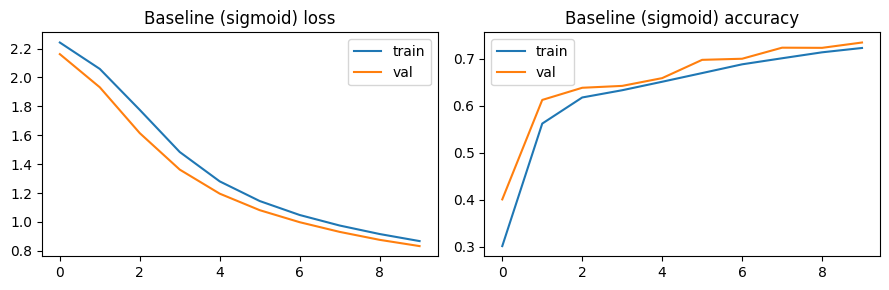

In [ ]:
baseline = make_mlp(activation="sigmoid", dropout=0.0)
baseline = compile_with_sgd(baseline, lr=0.1)

hist_A = baseline.fit(
    x_train, y_train,
    batch_size=1000,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

test_loss_A, test_acc_A = baseline.evaluate(x_test, y_test, verbose=0)
print(f"Baseline (sigmoid) test_acc={test_acc_A:.4f}  test_loss={test_loss_A:.4f}")

plot_history(hist_A, "Baseline (sigmoid)")

Training Model with Sigmoid and Dropout

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.1138 - loss: 2.4034 - val_acc: 0.4513 - val_loss: 2.1657
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.1913 - loss: 2.2021 - val_acc: 0.5728 - val_loss: 1.9759
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2946 - loss: 1.9962 - val_acc: 0.5500 - val_loss: 1.7083
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3839 - loss: 1.7374 - val_acc: 0.6090 - val_loss: 1.4716
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.4347 - loss: 1.5394 - val_acc: 0.6108 - val_loss: 1.3076
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4900 - loss: 1.3878 - val_acc: 0.6507 - val_loss: 1.1916
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.5247 - loss: 1.2858 - val_acc: 0.6718 - val_loss: 1.1077
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5515 - loss: 1.2087 - val_acc: 0.6767 - val_loss: 1.0434
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5728 - loss:

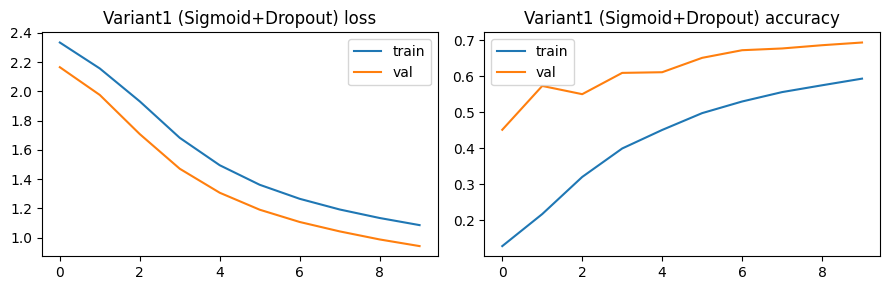

In [ ]:
variant1 = make_mlp(activation="sigmoid", dropout=0.3)
variant1 = compile_with_sgd(variant1, lr=0.1)

hist_A = variant1.fit(
    x_train, y_train,
    batch_size=1000,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

test_loss_B, test_acc_B = variant1.evaluate(x_test, y_test, verbose=0)
print(f"Variant1 (Sigmoi+Dropout) test_acc={test_acc_B:.4f}  test_loss={test_loss_B:.4f}")

plot_history(hist_A, "Variant1 (Sigmoid+Dropout)")

Training Model with ReLU and no Dropout

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.5497 - loss: 1.4518 - val_acc: 0.7060 - val_loss: 0.7788
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7473 - loss: 0.7301 - val_acc: 0.7767 - val_loss: 0.6678
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7829 - loss: 0.6188 - val_acc: 0.8040 - val_loss: 0.5535
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7992 - loss: 0.5672 - val_acc: 0.8072 - val_loss: 0.5389
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8160 - loss: 0.5263 - val_acc: 0.8042 - val_loss: 0.5530
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8294 - loss: 0.4981 - val_acc: 0.8308 - val_loss: 0.4798
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8282 - loss: 0.4886 - val_acc: 0.8313 - val_loss: 0.4902
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8334 - loss: 0.4778 - val_acc: 0.8212 - val_loss: 0.5044
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8376 - loss:

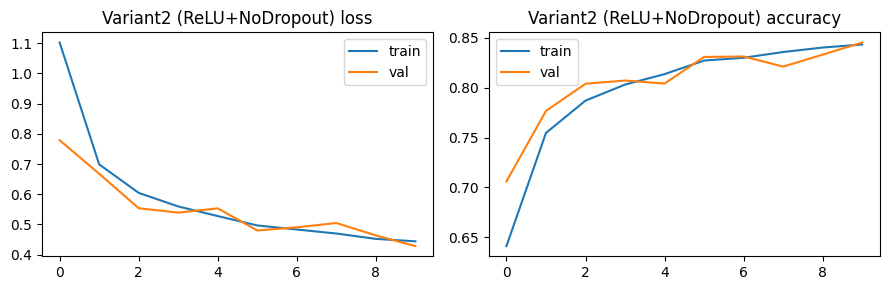

In [ ]:
variant2 = make_mlp(activation="relu", dropout=0.0)
variant2 = compile_with_sgd(variant2, lr=0.1)

hist_B = variant2.fit(
    x_train, y_train,
    batch_size=1000,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

test_loss_C, test_acc_C = variant2.evaluate(x_test, y_test, verbose=0)
print(f"Variant2 (ReLU+NoDropout) test_acc={test_acc_C:.4f}  test_loss={test_loss_C:.4f}")

plot_history(hist_B, "Variant2 (ReLU+NoDropout)")

Training Model with ReLU and Dropout

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.4331 - loss: 1.6364 - val_acc: 0.7542 - val_loss: 0.7353
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7054 - loss: 0.8466 - val_acc: 0.7778 - val_loss: 0.6173
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7505 - loss: 0.7169 - val_acc: 0.8050 - val_loss: 0.5561
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7712 - loss: 0.6535 - val_acc: 0.8182 - val_loss: 0.5179
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7900 - loss: 0.6040 - val_acc: 0.8253 - val_loss: 0.4932
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7991 - loss: 0.5773 - val_acc: 0.8278 - val_loss: 0.4755
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8083 - loss: 0.5534 - val_acc: 0.8297 - val_loss: 0.4627
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8168 - loss: 0.5258 - val_acc: 0.8350 - val_loss: 0.4512
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8214 - loss:

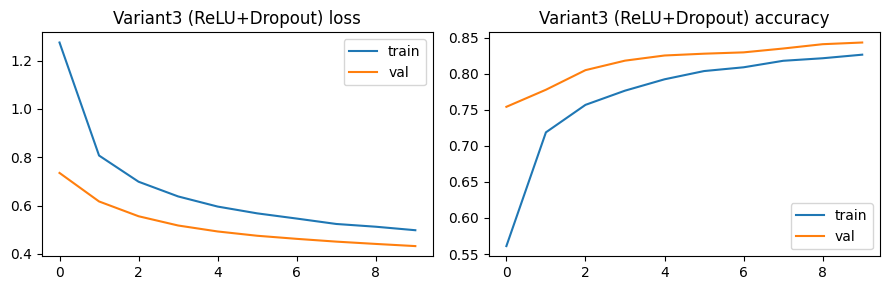

In [ ]:
variant3 = make_mlp(activation="relu", dropout=0.3)
variant3 = compile_with_sgd(variant3, lr=0.1)

hist_B = variant3.fit(
    x_train, y_train,
    batch_size=1000,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

test_loss_D, test_acc_D = variant3.evaluate(x_test, y_test, verbose=0)
print(f"Variant3 (ReLU+Dropout) test_acc={test_acc_D:.4f}  test_loss={test_loss_D:.4f}")

plot_history(hist_B, "Variant3 (ReLU+Dropout)")

Model Ranking

In [ ]:
candidates = [
    ("Sigmoid_No_Dropout",   baseline, test_acc_A, test_loss_A),
    ("Sigmoid_Dropout",     variant1, test_acc_B, test_loss_B),
    ("ReLU_No_Dropout",      variant2, test_acc_C, test_loss_C),
    ("ReLU_Dropout",        variant3, test_acc_D, test_loss_D),
]

ranked = sorted(candidates, key=lambda x: (-x[2], x[3]))

best_name, best_model, best_acc, best_loss = ranked[0]

print(f"{'Rank':<5} {'Model':<18} {'Test Acc':>9} | {'Test Loss':>9}")
print("-" * 48)
for i, (name, model, acc, loss) in enumerate(ranked, start=1):
    print(f"{i:<5} {name:<18} {acc:>9.4f} | {loss:>9.4f}")

print(f"\nBest: {best_name}  |  acc={best_acc:.4f}  loss={best_loss:.4f}")


Rank  Model               Test Acc | Test Loss
------------------------------------------------
1     ReLU_No_Dropout       0.8401 |    0.4508
2     ReLU_Dropout          0.8366 |    0.4576
3     Sigmoid_No_Dropout    0.7212 |    0.8562
4     Sigmoid_Dropout       0.6696 |    0.9632

Best: ReLU_No_Dropout  |  acc=0.8401  loss=0.4508


Confusion Matrix Helper

In [ ]:
def plot_confusion_grid(models, x_test, y_test, normalize=False, cmap="Blues",
                        figsize=(14, 12), class_names=None):
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.ravel()

    for ax, (title, mdl) in zip(axes, models):
        y_pred = np.argmax(mdl.predict(x_test, verbose=0), axis=1)
        cm = confusion_matrix(y_test, y_pred)

        if normalize:
            cm = cm / cm.sum(axis=1, keepdims=True)
            vmin, vmax, fmt = 0.0, 1.0, ".2f"
        else:
            vmin, vmax, fmt = None, None, "d"

        sns.heatmap(
            cm, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, cbar=False,
            annot=False
        )
        ax.set_title(f"{title} — {'row-normalized' if normalize else 'counts'}")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")

        if class_names is not None:
            ax.set_xticks(np.arange(len(class_names)) + 0.5, labels=class_names, rotation=45, ha="right")
            ax.set_yticks(np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0)

    plt.tight_layout()
    plt.show()

Confusion Matrix and Classification report

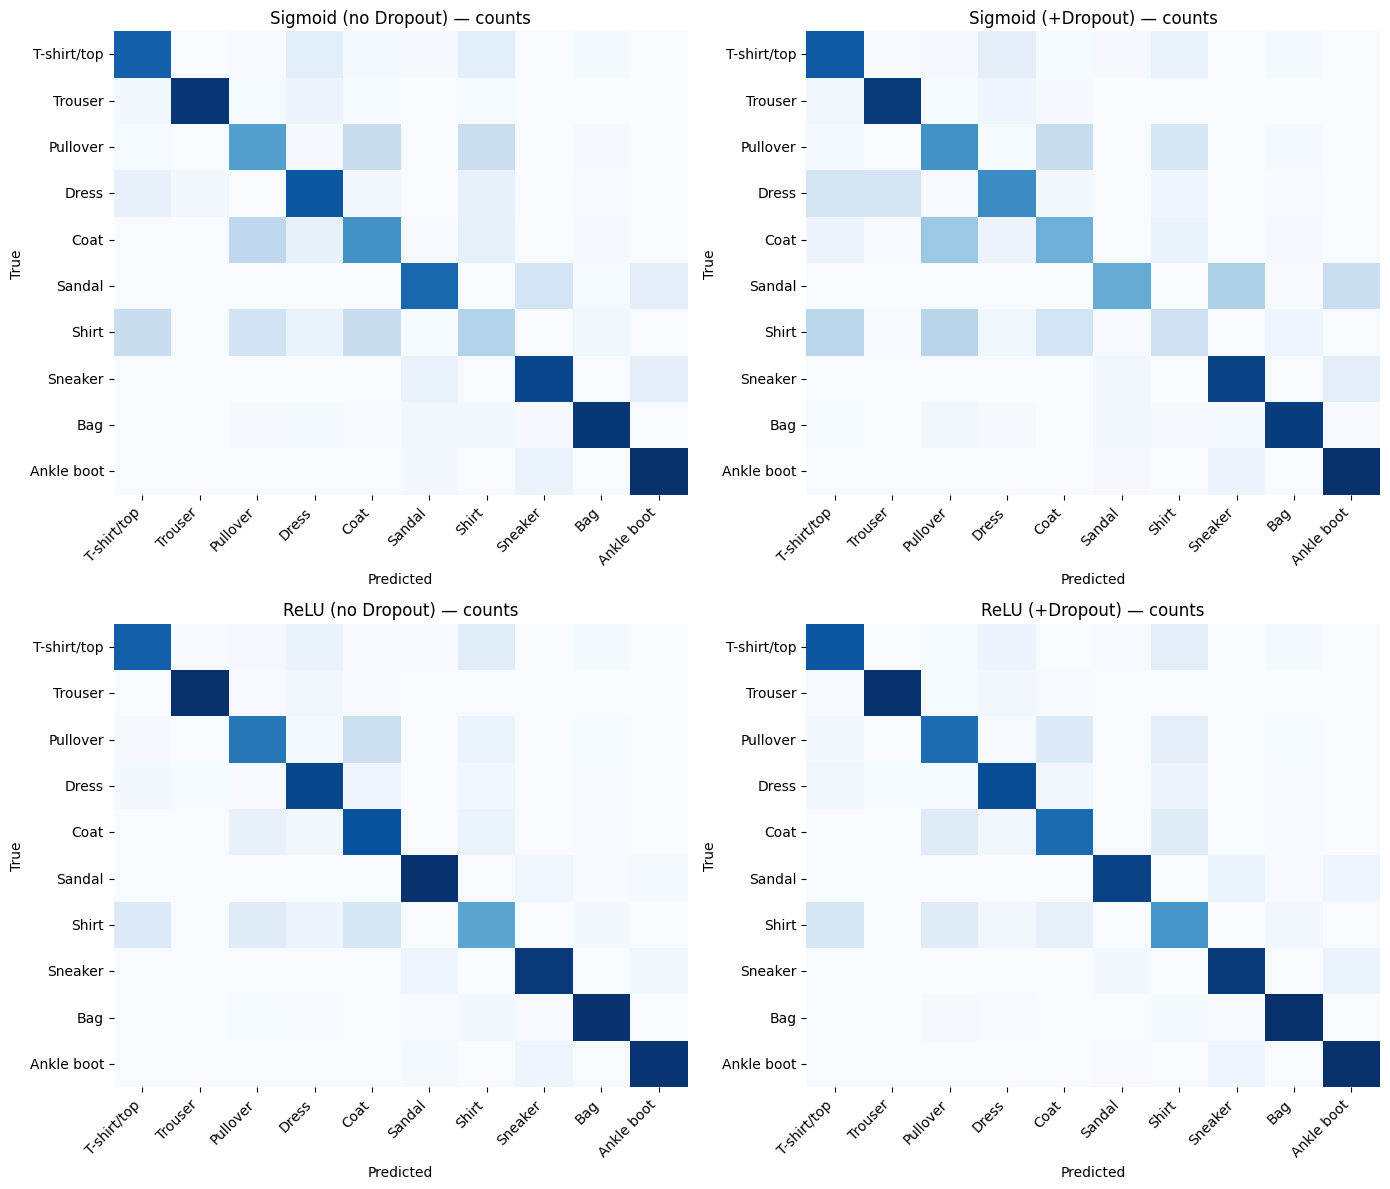

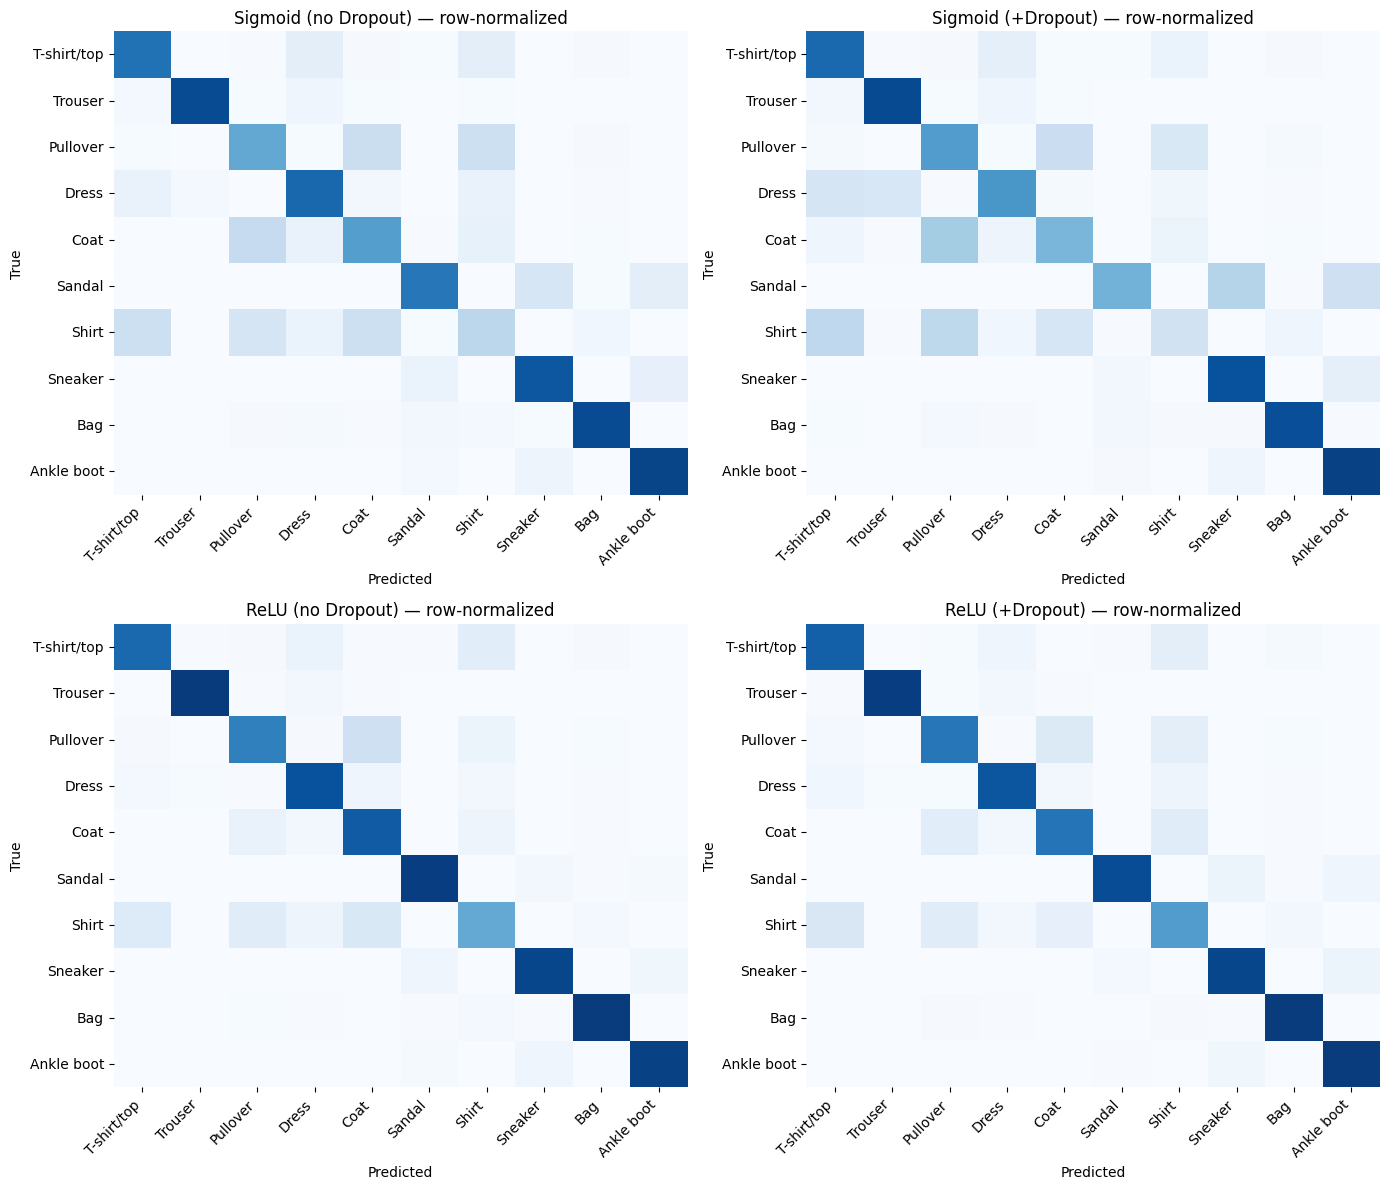


=== Classification report — Sigmoid (no Dropout) ===
              precision    recall  f1-score   support

 T-shirt/top      0.699     0.749     0.723      1000
     Trouser      0.961     0.898     0.929      1000
    Pullover      0.536     0.524     0.530      1000
       Dress      0.712     0.788     0.748      1000
        Coat      0.533     0.574     0.553      1000
      Sandal      0.829     0.727     0.775      1000
       Shirt      0.365     0.285     0.320      1000
     Sneaker      0.788     0.848     0.817      1000
         Bag      0.904     0.896     0.900      1000
  Ankle boot      0.832     0.923     0.875      1000

    accuracy                          0.721     10000
   macro avg      0.716     0.721     0.717     10000
weighted avg      0.716     0.721     0.717     10000


=== Classification report — Sigmoid (+Dropout) ===
              precision    recall  f1-score   support

 T-shirt/top      0.592     0.785     0.675      1000
     Trouser      0.834   

In [ ]:
models4 = [
    ("Sigmoid (no Dropout)", baseline),
    ("Sigmoid (+Dropout)",  variant1),
    ("ReLU (no Dropout)",   variant2),
    ("ReLU (+Dropout)",     variant3),
]

plot_confusion_grid(models4, x_test, y_test, normalize=False, class_names=CLASS_NAMES)

plot_confusion_grid(models4, x_test, y_test, normalize=True, class_names=CLASS_NAMES)

for name, mdl in models4:
    y_pred = np.argmax(mdl.predict(x_test, verbose=0), axis=1)
    print(f"\n=== Classification report — {name} ===")
    print(classification_report(y_test, y_pred, target_names=CLASS_NAMES, digits=3))

Saving to drive (this was for personal use)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
!mkdir -p "/content/drive/MyDrive/fmnist_models"

baseline.save("/content/drive/MyDrive/fmnist_models/baseline_sigmoid.keras")
variant1.save("/content/drive/MyDrive/fmnist_models/variant_sigmoid_dropout.keras")
variant2.save("/content/drive/MyDrive/fmnist_models/variant_relu.keras")
variant3.save("/content/drive/MyDrive/fmnist_models/variant_relu_dropout.keras")
print("Saved to Drive at /content/drive/MyDrive/fmnist_models/")

Mounted at /content/drive
Saved to Drive at /content/drive/MyDrive/fmnist_models/


Demo for a single image (also a simple sanity set for personal use)

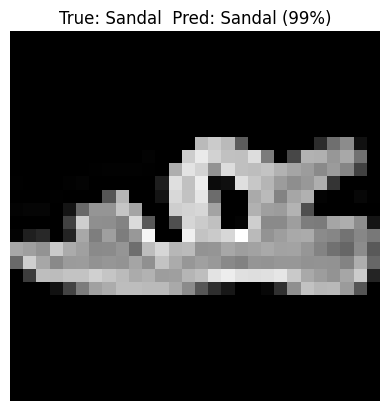

In [ ]:
idx = np.random.randint(0, len(x_test))
x = x_test[idx][None, ...]     # shape (1, 784)
true_label = CLASS_NAMES[int(y_test[idx])]

probs = best_model.predict(x, verbose=0)[0]
pred_idx = int(np.argmax(probs))
pred_label = CLASS_NAMES[pred_idx]
conf = float(probs[pred_idx])

img = (x_test[idx].reshape(28, 28) * 255).astype("uint8")
plt.imshow(img, cmap="gray", interpolation="nearest")
plt.title(f"True: {true_label}  Pred: {pred_label} ({conf:.0%})")
plt.axis("off")
plt.show()

Test with custom image

In [ ]:
MODEL_PATH = "/content/drive/MyDrive/fmnist_models/variant_relu_dropout.keras"
IMG_PATH   = "/content/drive/MyDrive/fmnist_models/sandal.png"

def preprocess_fmnist_image(path):
    img = Image.open(path).convert("L")
    w, h = img.size
    side = min(w, h)
    left = (w - side) // 2
    top  = (h - side) // 2
    img = img.crop((left, top, left + side, top + side))
    img = img.resize((28, 28), resample=Image.BILINEAR)

    arr = np.asarray(img, dtype="float32") / 255.0
    x = arr.reshape(1, 28 * 28)
    return img, x

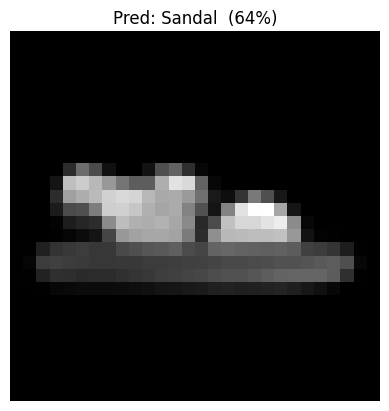

Top-5 probabilities:
      Sandal: 64.19%
         Bag: 8.68%
     Sneaker: 6.31%
       Shirt: 5.92%
 T-shirt/top: 3.52%


In [ ]:
disp_img, x = preprocess_fmnist_image(IMG_PATH)

probs = best_model.predict(x, verbose=0)[0]
pred_idx = int(np.argmax(probs))
pred_label = CLASS_NAMES[pred_idx]
conf = float(probs[pred_idx])

plt.imshow(disp_img, cmap="gray", interpolation="nearest")
plt.title(f"Pred: {pred_label}  ({conf:.0%})")
plt.axis("off")
plt.show()

topk = np.argsort(probs)[-5:][::-1]
print("Top-5 probabilities:")
for i in topk:
    print(f"{CLASS_NAMES[i]:>12s}: {probs[i]:.2%}")
